# Capítulo 6 — Estabilidade de Sistemas Lineares com Realimentação
### Parte 1 — Fundamentos teóricos e simulações
Disciplina: Controle e Automação — 2025.2


In [2]:
!pip install control sympy --quiet

import numpy as np
import matplotlib.pyplot as plt
import control  # importa o módulo inteiro
from control import tf, step_response
import warnings
warnings.filterwarnings('ignore')

# configuração de estilo dos gráficos
plt.rcParams['figure.figsize'] = (8,5)

# função auxiliar para listar polos
def pole(G):
    """Retorna os polos do sistema de transferência G."""
    return control.poles(G)


In [3]:
import math

def routh_table(coeffs):
    coeffs = [float(c) for c in coeffs]
    n = len(coeffs) - 1
    m = math.ceil((n+1)/2)
    table = [[0]*m for _ in range(n+1)]
    table[0][:len(coeffs[0::2])] = coeffs[0::2]
    table[1][:len(coeffs[1::2])] = coeffs[1::2]

    for i in range(2, n+1):
        for j in range(m-1):
            a = table[i-2][0]
            b = table[i-2][j+1]
            c = table[i-1][0]
            d = table[i-1][j+1]
            if c == 0: c = 1e-6
            table[i][j] = ((c*b) - (a*d)) / c
    return table

def sign_changes(table):
    col = [r[0] for r in table]
    col = [1e-6 if c == 0 else c for c in col]
    return sum(np.sign(col[i]) != np.sign(col[i+1]) for i in range(len(col)-1))


In [4]:
coeffs = [1, 2, 4, 8]
table = routh_table(coeffs)
for i, row in enumerate(table):
    print(f"s^{len(table)-1-i}: {row}")
print("\nMudanças de sinal:", sign_changes(table))


s^3: [1.0, 4.0]
s^2: [2.0, 8.0]
s^1: [0.0, 0]
s^0: [8.0, 0]

Mudanças de sinal: 0


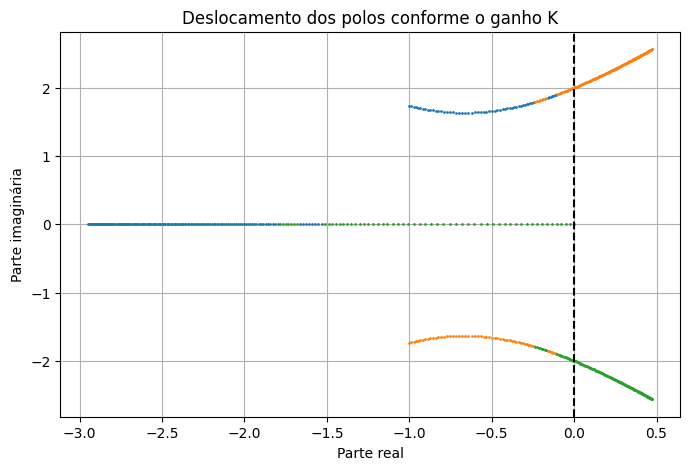

In [5]:
Ks = np.linspace(0, 20, 200)
polos = []

for K in Ks:
    coeffs = [1, 2, 4, K]
    r = np.roots(coeffs)
    polos.append(r)

polos = np.array(polos)

plt.title("Deslocamento dos polos conforme o ganho K")
for i in range(polos.shape[1]):
    plt.plot(np.real(polos[:,i]), np.imag(polos[:,i]), '.', markersize=2)
plt.axvline(0, color='k', linestyle='--')
plt.xlabel("Parte real")
plt.ylabel("Parte imaginária")
plt.grid(True)
plt.show()


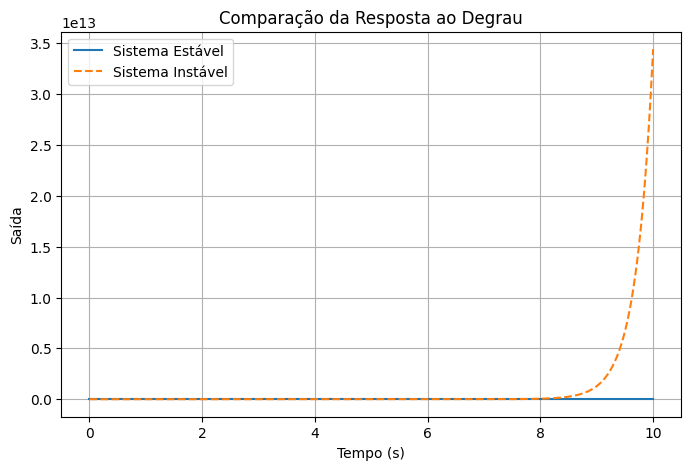

In [6]:
G_estavel = tf([10], [1, 4, 13, 10])
G_instavel = tf([10], [1, -2, -3, -4])

t = np.linspace(0, 10, 1000)
t1, y1 = step_response(G_estavel, t)
t2, y2 = step_response(G_instavel, t)

plt.plot(t1, y1, label="Sistema Estável")
plt.plot(t2, y2, label="Sistema Instável", linestyle='--')
plt.title("Comparação da Resposta ao Degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída")
plt.grid(True)
plt.legend()
plt.show()


In [7]:
from numpy.linalg import eigvals

A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-2, -3, -4]])

autovalores = eigvals(A)
print("Autovalores:", autovalores)
print("Sistema estável?", np.all(np.real(autovalores) < 0))


Autovalores: [-3.26953084+0.j         -0.36523458+0.69160123j -0.36523458-0.69160123j]
Sistema estável? True
